<a href="https://colab.research.google.com/github/HosseinEyvazi/Vision-AI-Booklet/blob/main/Vision4_Generative_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## A Simple Introduction to Generative Adversarial Networks (GANs)

### 1. The Main Idea: A Game of Cat and Mouse 🐱🐭

The main idea behind a GAN is to have two neural networks, a **Generator** and a **Discriminator**, compete against each other in a game. This forces the Generator to create increasingly realistic data. Think of it like a game between an art forger and an art detective.

* The **Forger (Generator)** tries to create fake paintings that look real.
* The **Detective (Discriminator)** tries to distinguish between real paintings and fakes.

As the game continues, the forger gets better at creating fakes, and the detective gets better at spotting them. This is an **unsupervised** learning task because you don't need labeled data, just a collection of real examples.

---

### 2. The Players and Their Architecture

GANs are typically built using deep neural networks, often based on Convolutional Neural Networks (CNNs) for image tasks.

#### The Generator (The Forger) 🎨

* **Goal**: To create fake data that is indistinguishable from real data.
* **Input**: A random vector of numbers, called a **noise vector** or **latent vector** ($z$). This is the "seed" for the image.
* **Architecture**: It's essentially an **inverse CNN** (a Deconvolutional Network). It starts with the small noise vector and upsamples it through a series of **Transposed Convolution** layers. These layers increase the spatial dimensions, gradually building the vector into a full image. The final layer often uses a **Tanh** activation function to scale the output pixels to a range of [-1, 1].

#### The Discriminator (The Detective) 🕵️

* **Goal**: To correctly identify whether an input image is real or fake.
* **Input**: An image (either real from the dataset or fake from the Generator).
* **Architecture**: It is a standard **CNN-based classifier**. It takes an image and passes it through a series of **Convolutional** layers, which extract features and reduce the image's dimensions (downsampling). The final layers flatten the features and feed them to a dense layer with a **Sigmoid** activation function, which outputs a single probability between 0 (fake) and 1 (real).

---

### 3. The Adversarial Training Process

The training is a **minimax game** where the two networks have opposing goals, captured by a single value function $V(D, G)$:

$$\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_{z}(z)}[\log(1 - D(G(z)))]$$

* **The Discriminator wants to maximize this function.** It tries to make $D(x)$ (for real images) close to 1 and $D(G(z))$ (for fake images) close to 0.
* **The Generator wants to minimize this function.** It tries to make $D(G(z))$ close to 1 to fool the discriminator.

---

### 4. The Goal: Perfect Deception

The ideal end state is called **Nash equilibrium**. This is achieved when the Generator creates images that are so realistic that the Discriminator can no longer tell the difference.

At this point, the Discriminator is just guessing randomly. Its accuracy for any image drops to **50% (or 1/2)**. When the discriminator's accuracy is stuck around 0.5, it's a good sign that the generator is performing well.


### GANs Architecture

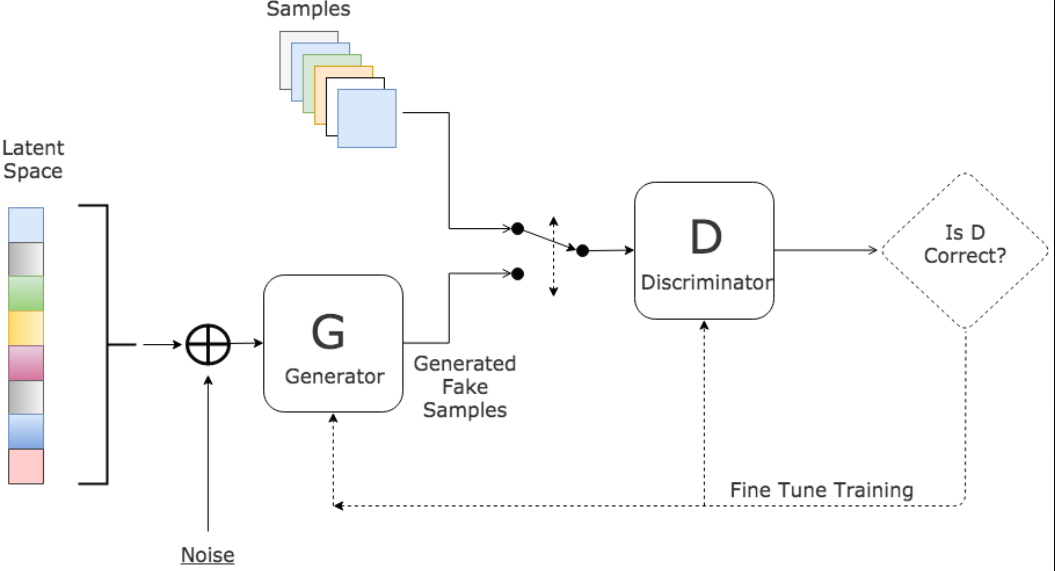

### GANs stopping criteria

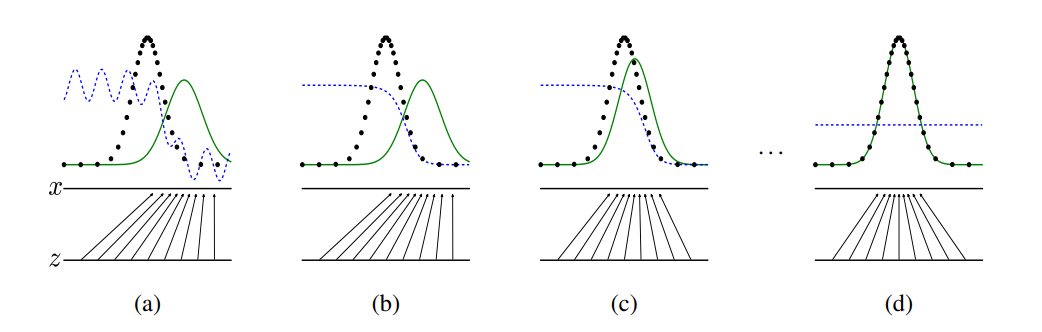


blue dots are the prediction of discriminator
\
green curve is the estimated distribution of of Generator
\
black dots are the distribution of Dataset itself

in (D):

- Estimated Data Distribution is matchehd to Dataset distribution.
- Therefore Accuracy of Discriminator is 1/2
- And this is stopping criteria



# A Guide to Modern Vision AI: From ViT to Diffusion Models

This guide covers the revolutionary models that have redefined how machines see and create. We'll explore the architectural shifts and core ideas that are essential to understand in the field of AI today.

---

## 1. Vision Transformer (ViT): Seeing the Whole Picture

For years, **Convolutional Neural Networks (CNNs)** were the undisputed kings of computer vision. However, they have an inherent limitation: they process images locally. A convolutional filter looks at a small patch of pixels and its immediate neighbors. To understand the whole image, it needs many layers to gradually build up a larger receptive field.

The **Vision Transformer (ViT)** proposed a radical new approach, inspired by the success of Transformers in Natural Language Processing (NLP).

### The Main Idea: An Image is a Sentence

ViT's core innovation is to treat an image not as a grid of pixels, but as a **sequence of patches**, like a sentence made of words. This allows it to capture **global dependencies** in an image from the very first layer. It determines the context of all pixels in relation to all other pixels, not just their neighbors.


### How It Works: The ViT Architecture

1.  **Patch Embedding**: The input image is split into fixed-size patches (e.g., 16x16 pixels). This is the key step for "tokenization."
2.  **Flatten & Project**: Each patch is flattened into a single long vector and then projected into a specific dimension through a linear layer.
3.  **Positional Encoding**: Just like in NLP, where word order matters, patch location matters. A positional encoding vector is added to each patch embedding to give the model information about the original location of that patch in the image.
4.  **Transformer Encoders**: This sequence of embedded patches is fed into a standard Transformer encoder, which consists of multiple heads of self-attention. This is where the model weighs the importance of every patch with respect to every other patch, learning the global context.
5.  **MLP Head**: The output from the Transformer is passed to a final Multi-Layer Perceptron (MLP) head for the specific task, such as image classification.

### Interview Takeaway

ViT's innovation was adapting the Transformer for vision by turning an image into a **sequence of patches**. Its main advantage is capturing **long-range, global relationships** within an image. Its primary weakness is that it requires **huge, large-scale datasets** (like JFT-300M) to outperform finely-tuned CNNs.

---

## 2. CLIP & DALL-E: The Bridge Between Text and Image

How can a model understand a phrase like "an avocado armchair"? This requires connecting the concepts of language to visual representations. CLIP and DALL-E were breakthrough models that solved this.

### CLIP: The Universal Translator

**CLIP (Contrastive Language-Image Pre-training)** is not a generative model itself, but an expert at understanding how well a piece of text describes an image.

#### The Main Idea

Learn a **shared space** where text and images can be compared. During training on 400 million image-text pairs from the internet, CLIP's goal was simple: make the vector for the text "a photo of a dog" very close to the vector of an actual dog photo, while pushing it far away from vectors of other images.


#### Architecture

* An **Image Encoder** (like a ViT or a ResNet) that creates a vector representation of an image.
* A **Text Encoder** (a standard Transformer) that creates a vector representation of a text caption.

These two encoders are trained together to align their outputs in a shared **multi-modal embedding space**.

#### CLIP as a Classifier (Zero-Shot!)

You can classify an image without any fine-tuning. Simply give CLIP an image and a list of text prompts like "a photo of a cat," "a photo of a dog." CLIP will encode the image and all the prompts and tell you which text prompt is closest to the image in the embedding space. This is powerful **zero-shot classification**.


### CLIP Architecture

- Note 1: first Image and text are the most related to each other in the Attention Matrix. But the first Image has a low relation with other in that attention matrix. This makes Innovations!!!
- Note 2 : The result of first and 2nd Encoder is An Embedding.

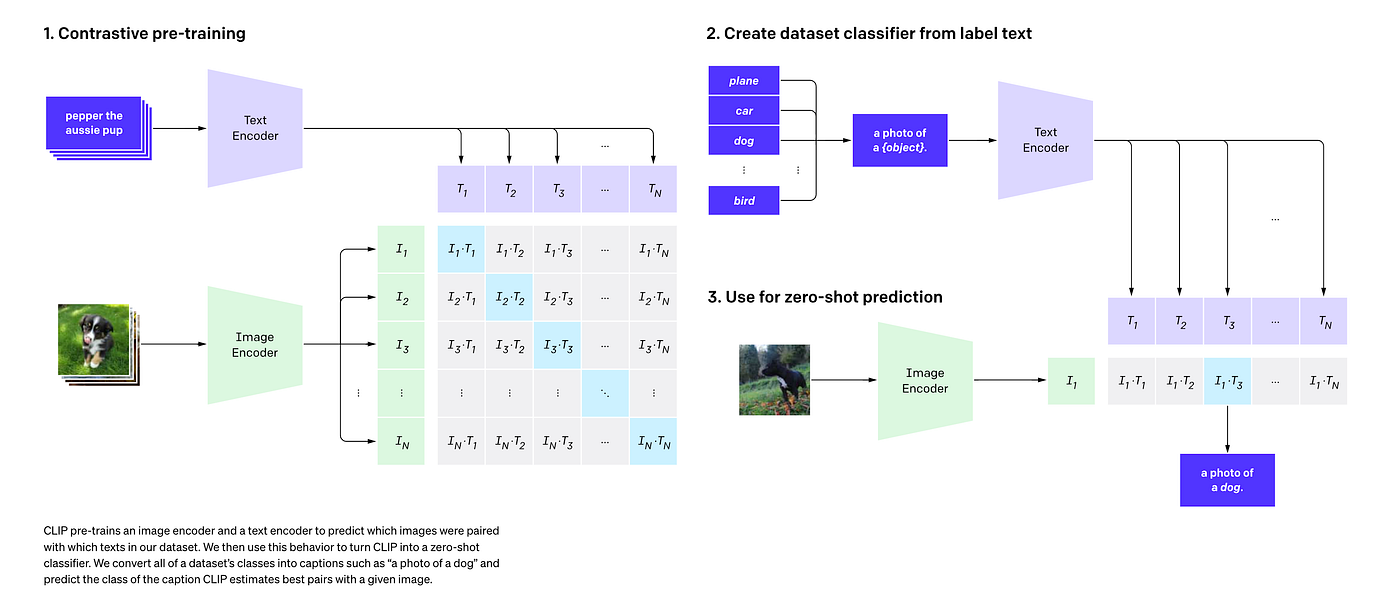

In final version of our model we have got the relation of texts and their related images. So if you pass an Image you can get that's related text AND REVERSE.


### DALL-E: The Artist

If CLIP is the critic that understands the relationship between text and art, **DALL-E** is the artist that creates it. It was one of the first models to captivate the world with its ability to generate novel, often surreal, images directly from text descriptions.

How the Original DALL-E Worked  

The first version of DALL-E operated as a **large, decoder-only Transformer**, similar in principle to GPT-3. It learned to *"draw"* by predicting a sequence of *image tokens* that should follow a sequence of *text tokens*.

1. **Image Tokenization**  
   - An image was first compressed into a sequence of discrete codes (like words in a vocabulary) using a separate model called a **Vector Quantized Variational Autoencoder (VQ-VAE)**.  
   - This turned a complex image into a simple sequence.  

2. **Autoregressive Generation**  
   - The Transformer was then trained on a long stream of data containing text followed by its corresponding image tokens.  
   - Given a new prompt like *"an armchair in the shape of an avocado,"* it would generate the most likely sequence of image tokens, one by one.  

3. **Decoding the Image**  
   - Finally, the VQ-VAE's decoder would translate this generated sequence of tokens back into a final pixel image.  


The Evolution: DALL-E 2 and Diffusion  

While revolutionary, the original DALL-E's images could sometimes be abstract. **DALL-E 2** achieved a massive leap in quality and realism by changing its architecture completely, creating a powerful pipeline that heavily relies on **CLIP** and a **Diffusion Model**.

1. **Text to Semantic Embedding**  
   - First, your text prompt (e.g., *"a photo of an astronaut riding a horse"*) is fed into CLIP's text encoder.  
   - This produces a vector that captures the meaning and essence of the prompt.  

2. **The "Prior" Model**  
   - A model called a *prior* then takes this text embedding and generates a corresponding **image embedding**.  
   - In essence, it imagines what an image with that specific meaning would look like within CLIP's shared space.  

3. **Diffusion Decoder ("unCLIP")**  
   - This is the final artist. A **Diffusion Model**, which is excellent at creating high-fidelity images, takes the image embedding as a strong guide.  
   - It starts with pure noise and, as explained in the next section, iteratively denoises it, steering the final result to perfectly match the image embedding.  


This multi-stage approach allowed **DALL-E 2** to produce much more photorealistic and coherent images that were more faithful to the input text than its predecessor.  


### Interview Takeaway

**CLIP** learns a shared semantic space for images and text, enabling powerful **zero-shot classification**. **DALL-E** and other generative models use this understanding to create images from text descriptions.

---

## 3. Diffusion Models: Sculpting Masterpieces from Noise

**Diffusion models** are the current **state-of-the-art (SOTA)** for generating high-fidelity images, and their principles are now being applied to video, 3D models, and audio.

### The Main Idea: A Process of Refined Denoising

Instead of generating an image in one step (like a GAN), diffusion models do it gradually. Think of a sculptor starting with a random block of marble (noise) and slowly chipping away until a statue (the image) is revealed. The model learns this process by first learning how to destroy an image into noise, and then perfectly reversing the steps.


#### Forward Process (Learning to Destroy)

During training, the model takes a clean image and slowly adds random noise over hundreds of steps until it becomes pure static. The model sees the image at every stage of this corruption. This teaches it the relationship between a slightly noisy image and the noise itself.

#### Reverse Process (Learning to Create)

The model's only job is to learn how to **predict the noise** that was added at any given step. To generate a new image, you start with a random noise input and run the model in reverse.

1.  Start with **pure random noise**.
2.  The model looks at the noisy image and predicts the noise pattern within it.
3.  A small amount of this predicted noise is **subtracted** from the image.
4.  This slightly less-noisy image is fed back into the model, and the process repeats.

After hundreds of steps of this iterative refinement, a clean and coherent image emerges from the initial static.

#### Text Guidance

This denoising process can be guided by a text prompt (using embeddings from a model like CLIP). At each step, the model predicts the noise in a way that will steer the image to be closer to the meaning of the text prompt.

### Interview Takeaway

**Diffusion models** are SOTA for generation. They work by learning to **reverse a noising process**, starting with pure noise and gradually denoising it over many steps to form a clean image. This **iterative refinement** allows for incredibly high-quality and detailed results, making them dominant in image, video, and voice generation.
